## 06-01 Weight Decay

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter

torch.__version__

'1.3.1'

### 1.生成数据

In [20]:
def generate_data(num_data=10, x_range=(-1, 1)):
    train_x = torch.linspace(*x_range, num_data).unsqueeze_(1)
    train_y = 1.5 * train_x + torch.normal(0, 0.5, size=train_x.size())
    test_x = torch.linspace(*x_range, num_data).unsqueeze_(1)
    test_y = 1.5 * test_x + torch.normal(0, 0.3, size=test_x.size())
    return train_x, train_y, test_x, test_y

train_x, train_y, test_x, test_y = generate_data()
train_x.size()

torch.Size([10, 1])

### 2.定义模型

In [21]:
class MLP(nn.Module):
    def __init__(self, num_hidden):
        super(MLP, self).__init__()
        self.linears = nn.Sequential(
            nn.Linear(1, num_hidden),
            nn.ReLU(inplace=True),
            nn.Linear(num_hidden, num_hidden),
            nn.ReLU(inplace=True),
            nn.Linear(num_hidden, num_hidden),
            nn.ReLU(inplace=True),
            nn.Linear(num_hidden, 1)
        )
    def forward(self, x):
        return self.linears(x)

net_normal = MLP(num_hidden=256)
net_wd = MLP(num_hidden=256)

### 3.定义优化器

In [22]:
optim_normal = torch.optim.SGD(net_normal.parameters(), lr=1e-2, momentum=0.9)
optim_wd = torch.optim.SGD(net_wd.parameters(), lr=1e-2, momentum=0.9, weight_decay=1e-2)

### 4.定义损失函数

In [23]:
loss_func = torch.nn.MSELoss()

### 5.迭代训练

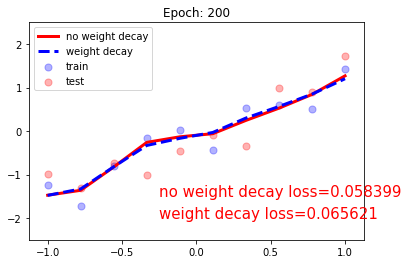

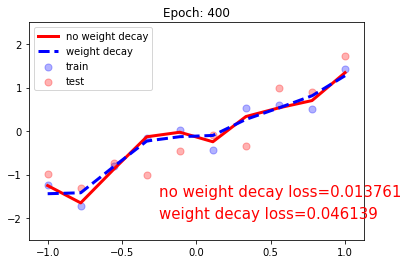

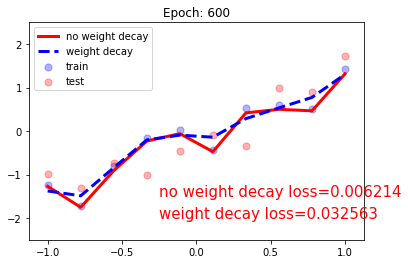

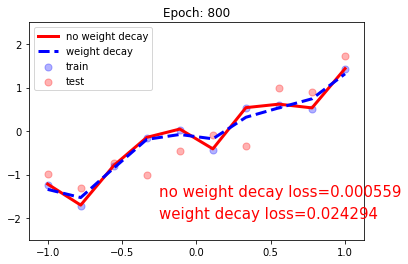

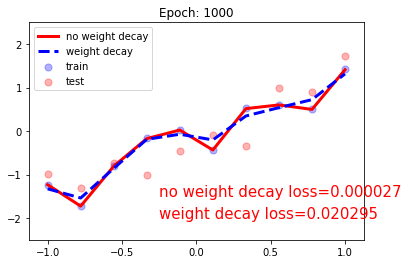

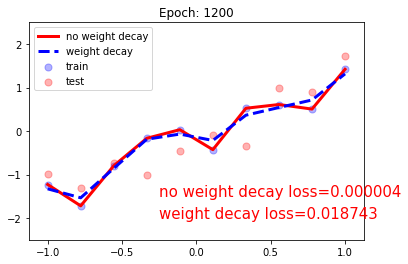

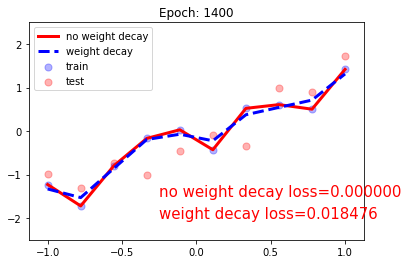

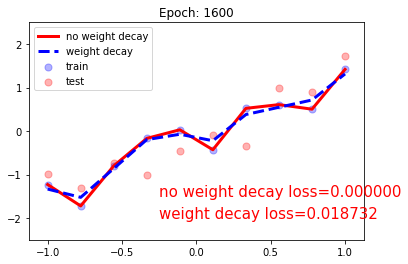

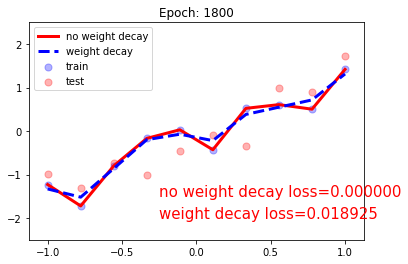

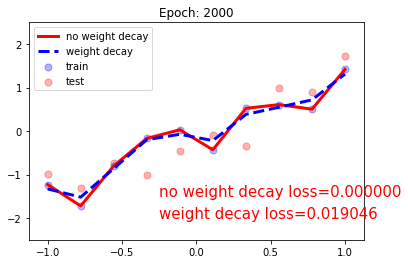

In [24]:
writer = SummaryWriter(comment='_weight_decay', filename_suffix='_weight_decay')

for epoch in range(2000):
    output_normal, output_wd = net_normal(train_x), net_wd(train_x)
    loss_normal, loss_wd = loss_func(output_normal, train_y), loss_func(output_wd, train_y)

    optim_normal.zero_grad()
    optim_wd.zero_grad()

    loss_normal.backward()
    loss_wd.backward()

    optim_normal.step()
    optim_wd.step()

    if (epoch + 1) % 200 == 0:
        # tensorboard
        for name, layer in net_normal.named_parameters():
            writer.add_histogram(name + '_grad_normal', layer.grad, epoch)
            writer.add_histogram(name + '_data_normal', layer, epoch)

        for name, layer in net_wd.named_parameters():
            writer.add_histogram(name + '_grad_wd', layer.grad, epoch)
            writer.add_histogram(name + '_data_wd', layer, epoch)

        test_pred_normal, test_pred_wd = net_normal(test_x), net_wd(test_x)
        # plot
        plt.scatter(train_x.data.numpy(), train_y.data.numpy(), c='blue', s=50, alpha=0.3, label='train')
        plt.scatter(test_x.data.numpy(), test_y.data.numpy(), c='red', s=50, alpha=0.3, label='test')
        plt.plot(test_x.data.numpy(), test_pred_normal.data.numpy(), 'r-', lw=3, label='no weight decay')
        plt.plot(test_x.data.numpy(), test_pred_wd.data.numpy(), 'b--', lw=3, label='weight decay')
        plt.text(-0.25, -1.5, 'no weight decay loss={:.6f}'.format(loss_normal.item()), fontdict={'size': 15, 'color': 'red'})
        plt.text(-0.25, -2, 'weight decay loss={:.6f}'.format(loss_wd.item()), fontdict={'size': 15, 'color': 'red'})

        plt.ylim((-2.5, 2.5))
        plt.legend(loc='upper left')
        plt.title("Epoch: {}".format(epoch+1))
        plt.show()
        plt.close()